In [1]:
from __future__ import print_function

import numpy as np
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

import sys, os, json

%matplotlib inline

In [2]:
base_dir = '/home/bgavin/repos/planning-mrmh-sar/'
exp_name = '000_190211-185142_test'
results_dir = os.path.join(base_dir, 'results', exp_name)

p_history = np.load( os.path.join(results_dir, 'p_history_190211-185142.npy') )

with open( os.path.join(results_dir, 'params_190211-185142.log'), 'r' ) as jfp:
    exp_params = json.load(jfp)

In [3]:
print(p_history.shape)
print( ', '.join( exp_params.keys() ) )

(200, 500, 500)
T, dt, exp_description, exp_id, exp_name, iter_steps, num_humans, num_iter, random_motion_init, random_pos, res, xlims, ylims, zlims


In [4]:
p_all = np.sum(p_history, axis=0).reshape(500, 500)
# p_all -= np.max(p_all)/15 + 0.018

p_all = 1/(1+np.exp(-p_all))

In [5]:
xmin, xmax = exp_params['xlims']
ymin, ymax = exp_params['ylims']
hmin, hmax = exp_params['zlims']
res = exp_params['res']

_x = np.linspace( xmin, xmax, int( (xmax-xmin)/float(res) ) )
_y = np.linspace( ymin, ymax, int( (ymax-ymin)/float(res) ) )

In [10]:
p_positive_ix = np.where(p_all>0.55)
p_negative_ix = np.where(p_all<0.5)

p_positive_ix = ((np.array(p_positive_ix, dtype=float)-250)/10)

In [11]:
print(p_positive_ix[0].shape)
print(p_negative_ix[0].shape)
print(p_all.shape)

(10594,)
(0,)
(500, 500)


(-10, 10)

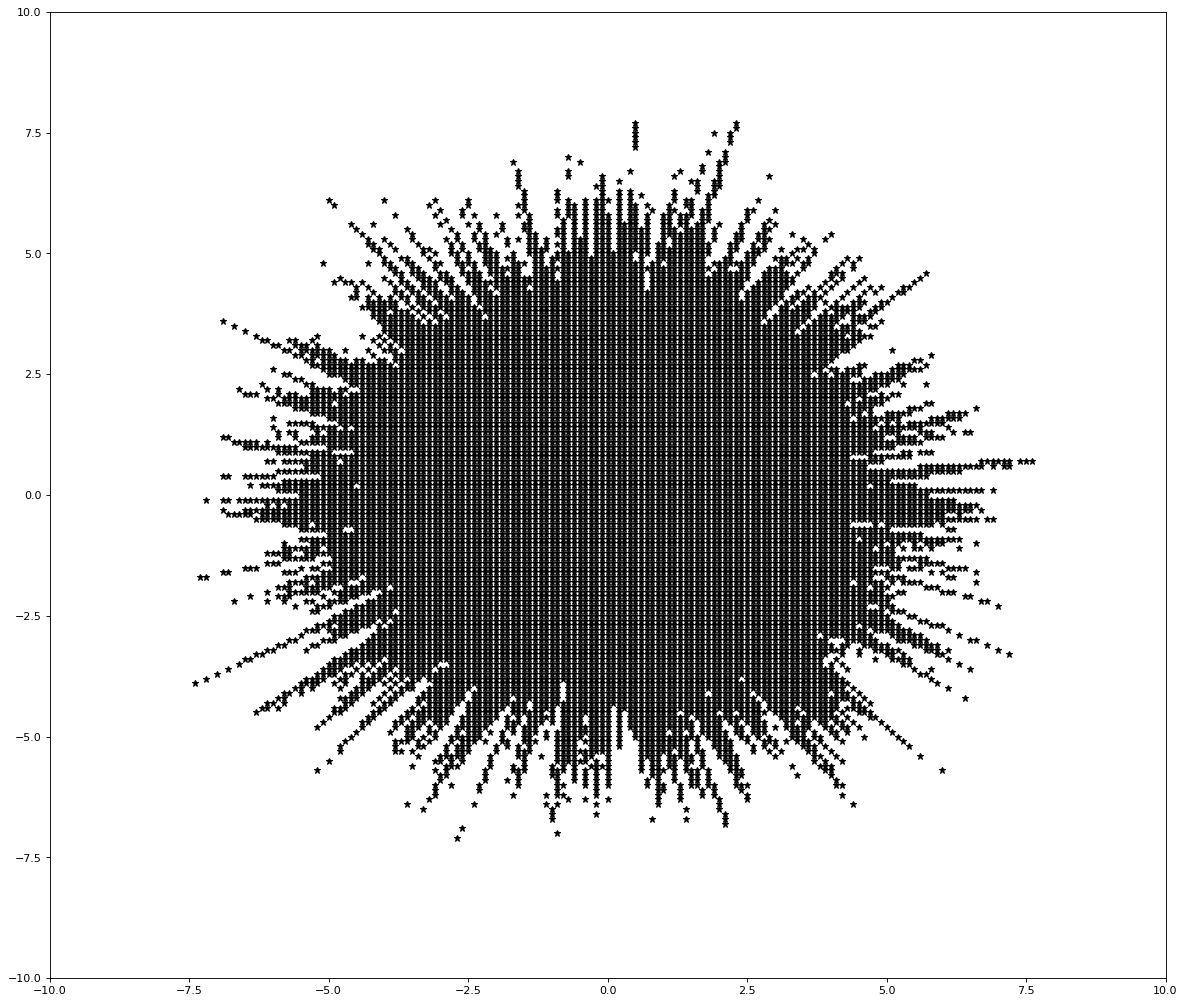

In [14]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(p_positive_ix[0], p_positive_ix[1], 'k*')

ax = plt.gca()
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))